In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
'''
    We want to manufacture cars of type A and B. How many cars of each type to manufacture per day? Suppose we have 
    3 resources R1,R2,R3 that are needed to manufacture these cars. 
    Car A needs 3 units of R1, 5 Units of R2 and 1.5 units of R3
    Car B needs 4 units of R1, 6 Units of R2 and 3 units of R3
    Maximum availability of resources per day is: R1=30 R2=60 R3=21
    Each car A Sale contributes $30,000 to the profits, car B Sale contributes $45,000 to the profits.
    How many cars should we manufacture each day of type A and type B?
'''

'\n    We want to manufacture cars of type A and B. How many cars of each type to manufacture per day? Suppose we have \n    3 resources R1,R2,R3 that are needed to manufacture these cars. \n    Car A needs 3 units of R1, 5 Units of R2 and 1.5 units of R3\n    Car B needs 4 units of R1, 6 Units of R2 and 3 units of R3\n    Maximum availability of resources per day is: R1=30 R2=60 R3=21\n    Each car A Sale contributes $30,000 to the profits, car B Sale contributes $45,000 to the profits.\n    How many cars should we manufacture each day of type A and type B?\n'

In [3]:
# pip install pulp
import pulp

In [4]:
#Instantiate our problem class
model=pulp.LpProblem("Profit_maximising_problem",pulp.LpMaximize)
A=pulp.LpVariable('A',lowBound=0,cat='Integer')
B=pulp.LpVariable('B',lowBound=0,cat='Integer')

In [5]:
# Objective Function
model+=30000*A+45000*B, "Profit"

In [6]:
# Constarints
model+= 3*A +4*B <=30
model+= 5*A +6*B <=60
model+= 1.5*A +3*B <=21

In [7]:
# Solve ourproblem
model.solve()
pulp.LpStatus[model.status]

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dai/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/01eb48ec49d24490803f56d391bb5b67-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/01eb48ec49d24490803f56d391bb5b67-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 21 RHS
At line 25 BOUNDS
At line 28 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 330000 - 0.00 seconds
Cgl0004I processed model has 3 rows, 2 columns (2 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 15000
Cbc0012I Integer solution of -330000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -330000, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Ma

'Optimal'

of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                330000.00000000
Enumerated nodes:               0
Total iterations:               0
Time (CPU seconds):             0.00
Time (Wallclock seconds):       0.00

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



In [8]:
# Print our decision variable values
print("Production of Car A={}".format(A.varValue))
print("Production of Car B={}".format(B.varValue))

Production of Car A=2.0
Production of Car B=6.0


In [9]:
# Print our objective function value
print(pulp.value(model.objective))

330000.0


In [10]:
# Just for testing - what if we want to manufacture at least 5 cars per day?
# Add another constraint
model += A>=5   # What-if Analysis

In [11]:
# Solve ourproblem
model.solve()
pulp.LpStatus[model.status]
# Print our decision variable values
print("Production of Car A={}".format(A.varValue))
print("Production of Car B={}".format(B.varValue))
# Print our objective function value
print(pulp.value(model.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dai/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/fb68fa46b68046738094077b4d75e414-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/fb68fa46b68046738094077b4d75e414-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 23 RHS
At line 28 BOUNDS
At line 31 ENDATA
Problem MODEL has 4 rows, 2 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 318750 - 0.00 seconds
Cgl0004I processed model has 3 rows, 2 columns (2 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 15000
Cbc0012I Integer solution of -315000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -315000, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Ma

In [12]:
# Some more constraints - One of the two below
model+=A>=B
# Solve ourproblem
model.solve()
pulp.LpStatus[model.status]
# Print our decision variable values
print("Production of Car A={}".format(A.varValue))
print("Production of Car B={}".format(B.varValue))
# Print our objective function value
print(pulp.value(model.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dai/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/bed9cdfa716348d3b4c13c8f2d27ca07-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/bed9cdfa716348d3b4c13c8f2d27ca07-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 26 RHS
At line 32 BOUNDS
At line 35 ENDATA
Problem MODEL has 5 rows, 2 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 318750 - 0.00 seconds
Cgl0004I processed model has 3 rows, 2 columns (2 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 15000
Cbc0012I Integer solution of -315000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -315000, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I M

In [13]:
# Some more constraints - One of the two below
model+=A<=B
# Solve ourproblem
model.solve()
pulp.LpStatus[model.status]
# Print our decision variable values
print("Production of Car A={}".format(A.varValue))
print("Production of Car B={}".format(B.varValue))
# Print our objective function value
print(pulp.value(model.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dai/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/29a61e7f4f844f3e96d0c8730f249c91-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/29a61e7f4f844f3e96d0c8730f249c91-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 29 RHS
At line 36 BOUNDS
At line 39 ENDATA
Problem MODEL has 6 rows, 2 columns and 11 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Production of Car A=5.0
Production of Car B=4.5
352500.0


# Example 2

In [14]:
# R1: labor : 2*x1 +1*x2+2.5*x3 <=60 Hours
# R2: Machine : 0.8*x1 +0.6*x2+1.0*x3 <=16 Hours
# R3: Wood : 30*x1 +20*x2+30*x3 <=400 Board-feet
# Products: chairs($30 Profit), Taables($40), Bookcases($45)
from pulp import *

In [15]:
# Create the problem variable to contain the problem data
model=LpProblem("FurnitureProblem",LpMaximize)

In [16]:
# Create 3 variable tables, chairs and bookcase
x1=LpVariable('Tables',0,None,LpInteger)
x2=LpVariable('Chairs',0,None,LpInteger)
x3=LpVariable('Bookcase',0,None,LpInteger)

# Create maximize objective function
model+=40*x1+30*x2+45*x3    # Variable * profit

In [17]:
# Create 3 constraints
model+=2*x1+1*x2+2.5*x3 <=60,"Labour"
model+=0.8*x1+0.6*x2+1*x3 <= 16, "Machine"
model+=30*x1+20*x2+30*x3 <= 400, "Wood"
# Try commenting the statement below and see the difference
# model+=x1>=1,"Chairs"
# model+=x3>=1,"Bookcases"

In [18]:
# The problem is solved using Pulp's choice of solver
model.solve()
#Each of the variable is printed with it's resolved optimum value
for v in model.variables():
    print(v.name,"=",v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dai/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/c8052deb4cd5451eb84218fb7c7ff204-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/c8052deb4cd5451eb84218fb7c7ff204-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 27 RHS
At line 31 BOUNDS
At line 35 ENDATA
Problem MODEL has 3 rows, 3 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 600 - 0.00 seconds
Cgl0004I processed model has 3 rows, 3 columns (3 integer (0 of which binary)) and 9 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0012I Integer solution of -600 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -600, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maximum de

In [19]:
model+=x1>=1,"Chairs"
# The problem is solved using Pulp's choice of solver
model.solve()
#Each of the variable is printed with it's resolved optimum value
for v in model.variables():
    print(v.name,"=",v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dai/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/6119f4a8110d4feb8610c1ec8afcda93-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/6119f4a8110d4feb8610c1ec8afcda93-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 29 RHS
At line 34 BOUNDS
At line 38 ENDATA
Problem MODEL has 4 rows, 3 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 595 - 0.00 seconds
Cgl0004I processed model has 3 rows, 3 columns (3 integer (0 of which binary)) and 9 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0012I Integer solution of -580 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0012I Integer solution of -595 found by DiveCoefficient after 1 iterations and 0 nodes (0.00 seconds)
Cbc0031

In [20]:
model+=x3>=1,"Bookcase"
# The problem is solved using Pulp's choice of solver
model.solve()
#Each of the variable is printed with it's resolved optimum value
for v in model.variables():
    print(v.name,"=",v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/dai/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/cb4c23ab0f6446c5a8b323526940c72e-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/cb4c23ab0f6446c5a8b323526940c72e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 31 RHS
At line 37 BOUNDS
At line 41 ENDATA
Problem MODEL has 5 rows, 3 columns and 11 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 595 - 0.00 seconds
Cgl0004I processed model has 3 rows, 3 columns (3 integer (0 of which binary)) and 9 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0012I Integer solution of -595 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -595, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maximum 

In [21]:
model+=x1>=1,"Chairs"
model+=x3>=1,"Bookcases"
# The problem is solved using Pulp's choice of solver
model.solve()
#Each of the variable is printed with it's resolved optimum value
for v in model.variables():
    print(v.name,"=",v.varValue)

PulpError: overlapping constraint names: Chairs

# Sample Question

In [22]:
# Apply Hypothesis Test to check If AQL of July and August months, all over the world are significantly different or
# same

In [23]:
df=pd.read_csv("data_date.csv")

In [24]:
df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       11100 non-null  object
 1   Country    11100 non-null  object
 2   Status     11100 non-null  object
 3   AQI Value  11100 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 347.0+ KB


In [26]:
df.describe()

,AQI Value
count,11100.000000
mean,61.883063
std,48.170101
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


In [27]:
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57
11096,2023-05-11,Vatican,Good,50
11097,2023-05-11,Venezuela,Good,17
11098,2023-05-11,Vietnam,Moderate,94


In [28]:
df['Month']=df['Date'].apply(lambda x:x[5:7] )
df

,Date,Country,Status,AQI Value,Month
0,2022-07-21,Albania,Good,14,07
1,2022-07-21,Algeria,Moderate,65,07
2,2022-07-21,Andorra,Moderate,55,07
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113,07
4,2022-07-21,Argentina,Moderate,63,07
...,...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57,05
11096,2023-05-11,Vatican,Good,50,05
11097,2023-05-11,Venezuela,Good,17,05
11098,2023-05-11,Vietnam,Moderate,94,05


In [29]:
df_month=df[(df.Month=='07') | (df.Month=='08')]
df_month

,Date,Country,Status,AQI Value,Month
0,2022-07-21,Albania,Good,14,07
1,2022-07-21,Algeria,Moderate,65,07
2,2022-07-21,Andorra,Moderate,55,07
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113,07
4,2022-07-21,Argentina,Moderate,63,07
...,...,...,...,...,...
6763,2022-08-31,Uzbekistan,Moderate,99,08
6764,2022-08-31,Vatican,Good,42,08
6765,2022-08-31,Venezuela,Good,17,08
6766,2022-08-31,Vietnam,Unhealthy for Sensitive Groups,107,08


In [30]:
''' 
Use 1) 2 sample T-Test
            or
    2) ANOVA Test  (This is preffered)
'''

' \nUse 1) 2 sample T-Test\n            or\n    2) ANOVA Test  (This is preffered)\n'

In [31]:
'''
Analysis of Varience
The purpose of Anova is to test if there is any significant difference between the means of two or more groups. 
We asueme 95% confidence level.
H0 (null hypothesis:)μ1=μ2=3=......=μk(It impliers that the means of all population are equal)
H1(alternate Hypothesis): Ti states that therewill be atleast one population mean that differs from the rest
'''

from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("data_date.csv")

In [36]:
#Convert Data column into datetime type
df['date_modified']=pd.to_datetime(df['Date'])
df.head()
df.dtypes#check data type

Date                     object
Country                  object
Status                   object
AQI Value                 int64
date_modified    datetime64[ns]
dtype: object

In [37]:
#Now drop the original Data column and rename the new column as Date, then make it first column
df.drop(['Date'],axis=1,inplace=True)
df.rename(columns={'date_modified':'Date'},inplace=True)
df=df[['Date','Country','Status','AQI Value']]
print(df.head())
print(df.dtypes)

        Date    Country                          Status  AQI Value
0 2022-07-21    Albania                            Good         14
1 2022-07-21    Algeria                        Moderate         65
2 2022-07-21    Andorra                        Moderate         55
3 2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4 2022-07-21  Argentina                        Moderate         63
Date         datetime64[ns]
Country              object
Status               object
AQI Value             int64
dtype: object


In [38]:
# Filter only for July and Agust Data
df=df[(df['Date'].dt.month==7)|(df['Date'].dt.month==8)]
# group_by_country_date=df.groupby(['Country','Date'])
#print(group_by_country_date)

# Group by country and a get list of all the AQI values for that country for July and August
result=df.groupby('Country')['AQI Value'].apply(list)
print(result)

Country
Albania       [14, 17, 15, 15, 20, 15, 20, 18, 55, 42, 44, 4...
Algeria       [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...
Andorra       [55, 51, 52, 51, 37, 33, 45, 41, 16, 21, 31, 2...
Angola        [113, 152, 110, 134, 126, 105, 109, 107, 117, ...
Argentina     [63, 61, 53, 61, 58, 49, 62, 42, 74, 35, 43, 3...
                                    ...                        
Uzbekistan    [60, 58, 98, 56, 116, 62, 92, 73, 57, 38, 75, ...
Vatican       [70, 70, 61, 61, 68, 68, 68, 57, 61, 53, 53, 6...
Venezuela     [3, 2, 20, 8, 11, 20, 20, 4, 5, 14, 18, 31, 21...
Vietnam       [43, 41, 76, 61, 119, 87, 119, 92, 84, 60, 88,...
Zambia        [39, 54, 36, 66, 100, 78, 82, 152, 89, 56, 73,...
Name: AQI Value, Length: 142, dtype: object


In [39]:
# Run ANOVA
F,p=f_oneway(*result)
print(F)
print(p)

120.03230465181719
0.0


In [40]:
# Conclusion: p=0, Since the p-value is less than 0.05 hence we would the reject the H0
print("""ince the p-value is less than 0.05, we reject Null Hypothesis, so there is difference between the mean AQI
      values od different countries""")

ince the p-value is less than 0.05, we reject Null Hypothesis, so there is difference between the mean AQI
      values od different countries


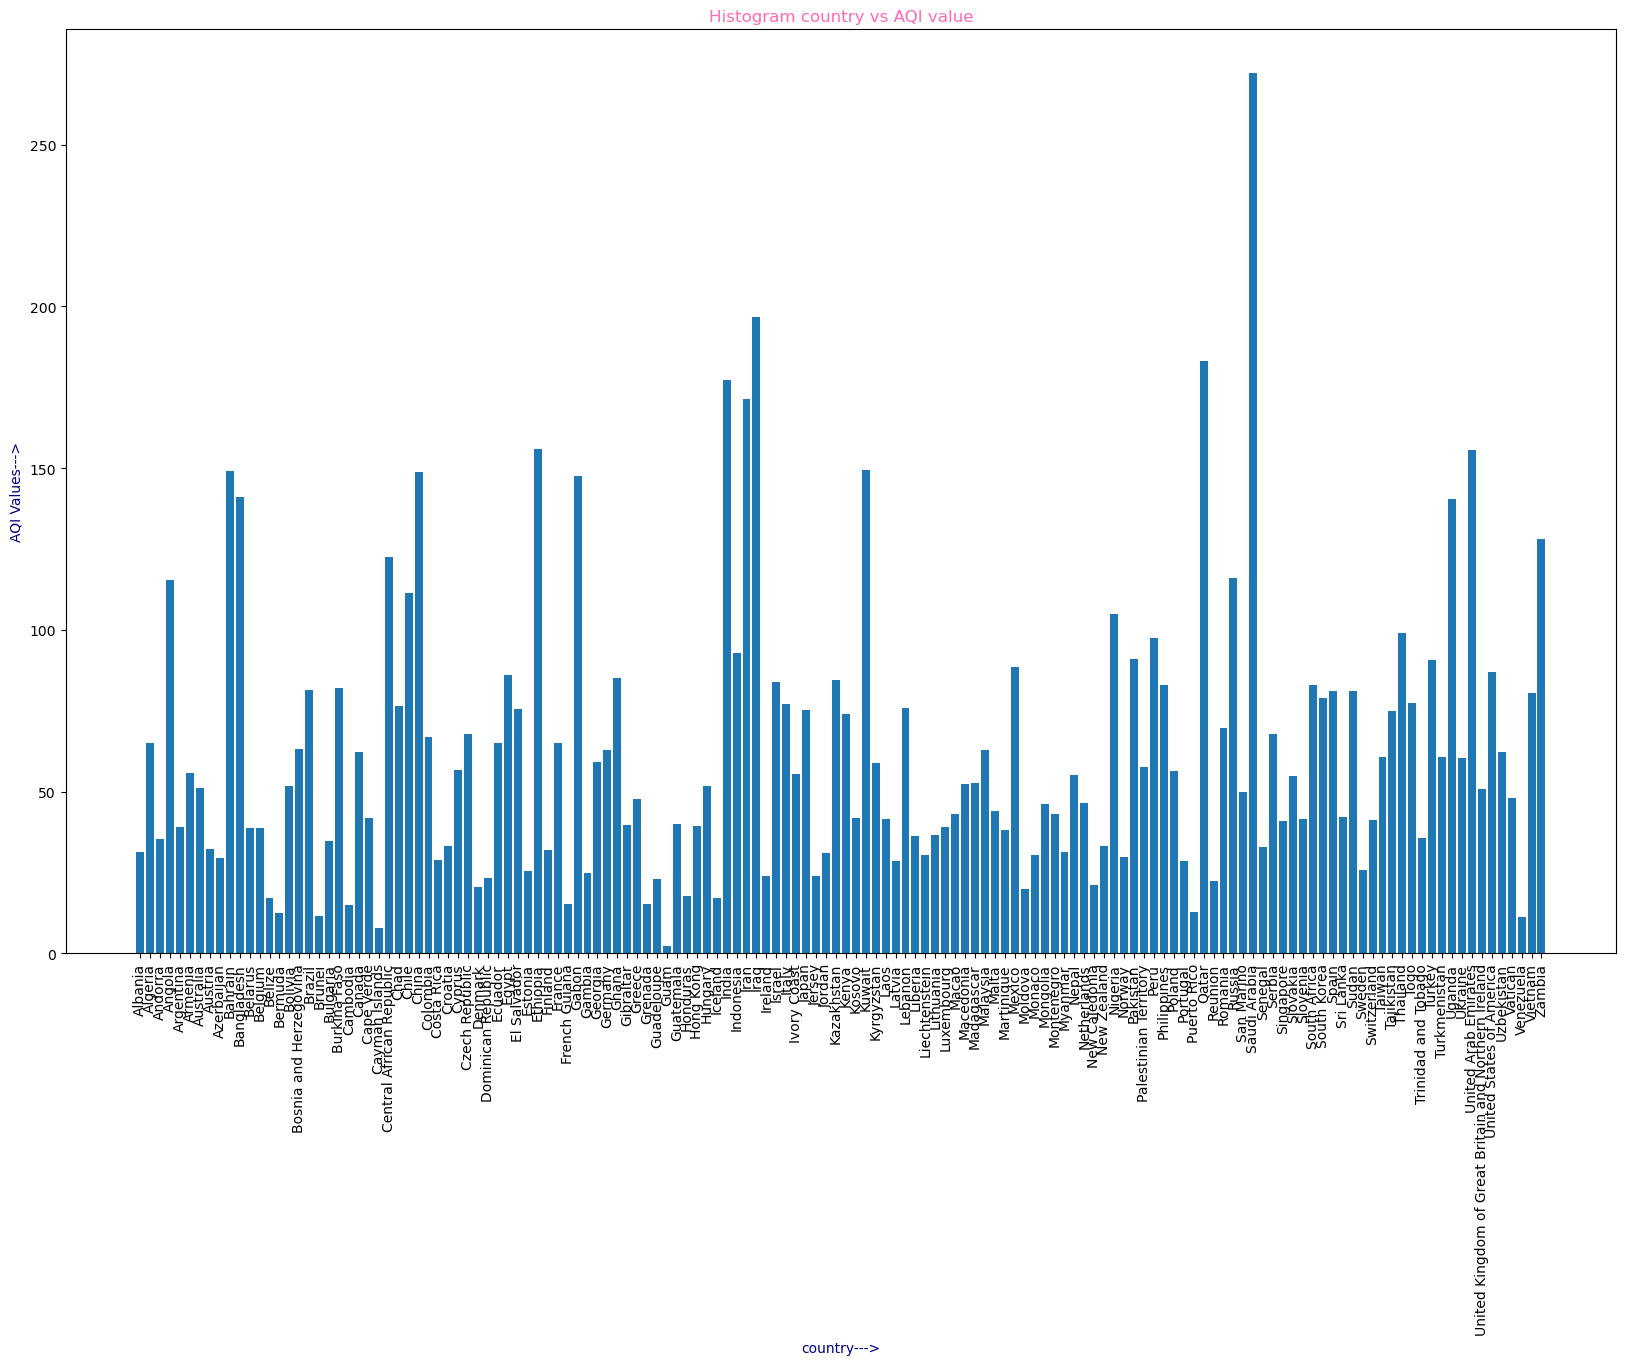

In [43]:
# Draw a histogram
means=df.groupby("Country")["AQI Value"].mean()
plt.figure(figsize=(20,12))
plt.bar(means.index.tolist(),means.values.tolist())

plt.xticks(rotation=90)
plt.title('Histogram country vs AQI value',color='hotpink')
plt.xlabel('country--->',color='navy')
plt.ylabel('AQI Values--->',color='navy')
plt.show()

# Q.2 Draw right visualization graphs for the following (2 marks each):

### 1.Day-wise AQI ofIndia
### 2.Outliers in AQI of Cyprus
### 3.Outliers in AQI of United Kingdom
### 4.Show relation between AQI of India and Nepal
### 5.Show relation between AQI of US and Canada

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
df=pd.read_csv("data_date.csv")

In [3]:
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57
11096,2023-05-11,Vatican,Good,50
11097,2023-05-11,Venezuela,Good,17
11098,2023-05-11,Vietnam,Moderate,94


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       11100 non-null  object
 1   Country    11100 non-null  object
 2   Status     11100 non-null  object
 3   AQI Value  11100 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 347.0+ KB


In [23]:
df_ind=df[df.Country=='India']
df_ind

,Date,Country,Status,AQI Value
59,2022-07-21,India,Unhealthy,162
201,2022-07-21,India,Unhealthy,162
343,2022-07-22,India,Very Unhealthy,226
484,2022-07-22,India,Unhealthy,160
625,2022-07-22,India,Unhealthy,153
...,...,...,...,...
10464,2023-04-13,India,Very Unhealthy,231
10604,2023-04-20,India,Very Unhealthy,235
10742,2023-04-27,India,Very Unhealthy,256
10880,2023-05-04,India,Unhealthy,181


In [24]:
g=df_ind.groupby('Date')
g=pd.Series(g['AQI Value'].mean())


In [26]:
g

Date
2022-07-21    162.000000
2022-07-22    179.666667
2022-07-23    143.500000
2022-07-24    147.000000
2022-07-25    146.000000
                 ...    
2023-04-13    231.000000
2023-04-20    235.000000
2023-04-27    256.000000
2023-05-04    181.000000
2023-05-11    218.000000
Name: AQI Value, Length: 72, dtype: float64

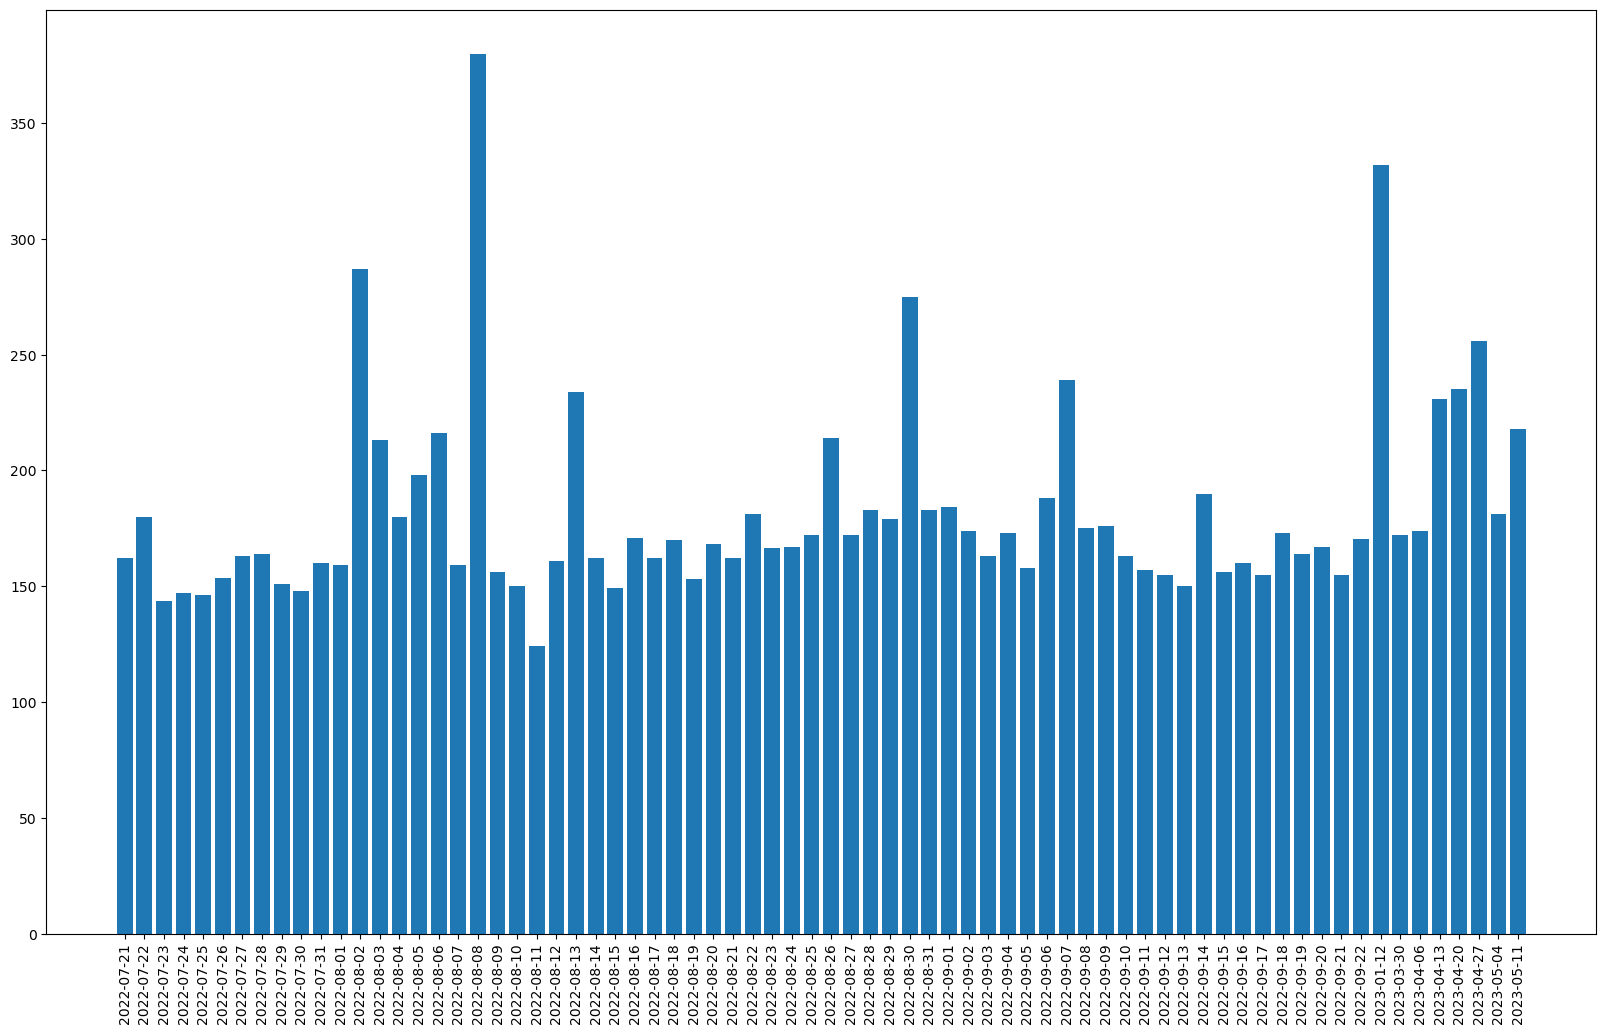

In [32]:
plt.figure(figsize=(20,12))
plt.bar(g.index,g.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Also Try Use Line Graph for above

In [35]:
df_cyprus=df[df.Country=='Cyprus']
df_cyprus

,Date,Country,Status,AQI Value
32,2022-07-21,Cyprus,Good,50
174,2022-07-21,Cyprus,Moderate,53
316,2022-07-22,Cyprus,Good,50
457,2022-07-22,Cyprus,Good,48
598,2022-07-22,Cyprus,Moderate,53
...,...,...,...,...
10439,2023-04-13,Cyprus,Good,40
10579,2023-04-20,Cyprus,Good,41
10717,2023-04-27,Cyprus,Moderate,53
10856,2023-05-04,Cyprus,Moderate,60


In [36]:
import seaborn as sns

In [44]:
cyprus_AQI=pd.Series(df_cyprus.groupby('Date')['AQI Value'].mean())
cyprus_AQI

Date
2022-07-21    51.500000
2022-07-22    50.333333
2022-07-23    45.500000
2022-07-24    31.000000
2022-07-25    40.000000
                ...    
2023-04-13    40.000000
2023-04-20    41.000000
2023-04-27    53.000000
2023-05-04    60.000000
2023-05-11    55.000000
Name: AQI Value, Length: 72, dtype: float64

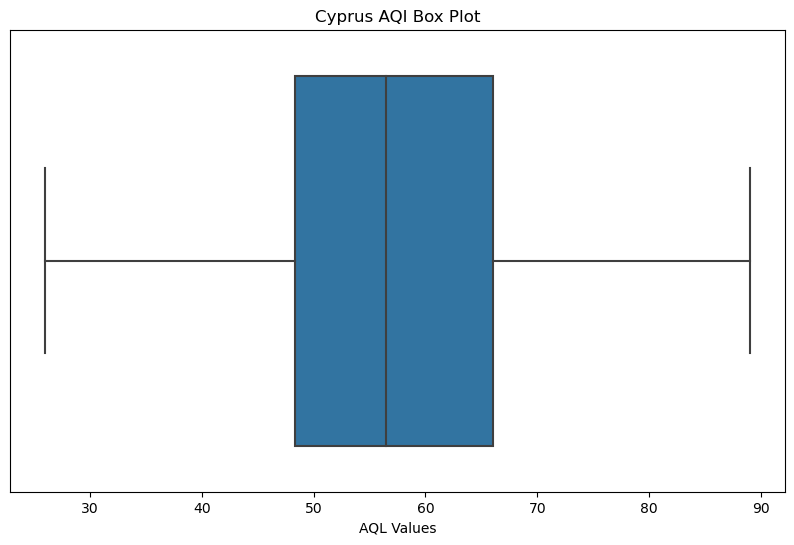

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(cyprus_AQI,orient="h")
plt.title('Cyprus AQI Box Plot')
plt.xlabel('AQL Values')
plt.yticks([])
plt.show()

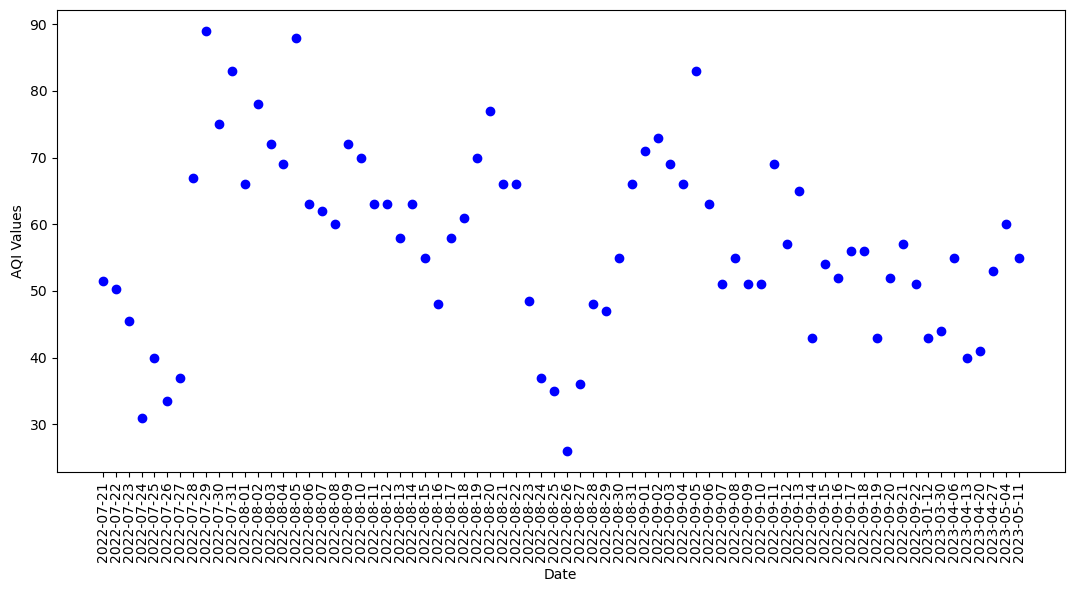

In [114]:
plt.figure(figsize=(13,6))
plt.scatter(cyprus_AQI.index,cyprus_AQI.values,marker='o',color='blue')

plt.xlabel('Date')
plt.ylabel('AQI Values')
plt.xticks(rotation=90)
plt.show()

In [67]:
df.sample(30)

,Date,Country,Status,AQI Value
2148,2022-07-31,Croatia,Good,26
3236,2022-08-07,Ukraine,Good,45
5702,2022-08-24,Indonesia,Moderate,93
10057,2023-01-12,Jordan,Good,21
2112,2022-07-30,Uzbekistan,Good,26
41,2022-07-21,Finland,Good,25
5073,2022-08-20,Uzbekistan,Good,2
9106,2022-09-17,New Caledonia,Good,22
10704,2023-04-27,Brunei,Good,10
200,2022-07-21,Iceland,Good,9


In [68]:
# 3.Outliers in AQI of United Kingdom
df_uk=df[df.Country=='United Kingdom of Great Britain and Northern Ireland']
df_uk

,Date,Country,Status,AQI Value
135,2022-07-21,United Kingdom of Great Britain and Northern I...,Moderate,55
277,2022-07-21,United Kingdom of Great Britain and Northern I...,Moderate,55
418,2022-07-22,United Kingdom of Great Britain and Northern I...,Good,49
559,2022-07-22,United Kingdom of Great Britain and Northern I...,Good,47
700,2022-07-22,United Kingdom of Great Britain and Northern I...,Good,43
...,...,...,...,...
10540,2023-04-13,United Kingdom of Great Britain and Northern I...,Good,44
10680,2023-04-20,United Kingdom of Great Britain and Northern I...,Moderate,63
10818,2023-04-27,United Kingdom of Great Britain and Northern I...,Moderate,75
10956,2023-05-04,United Kingdom of Great Britain and Northern I...,Moderate,75


In [69]:
uk_outlier=pd.Series(df_uk.groupby('Date')['AQI Value'].mean())

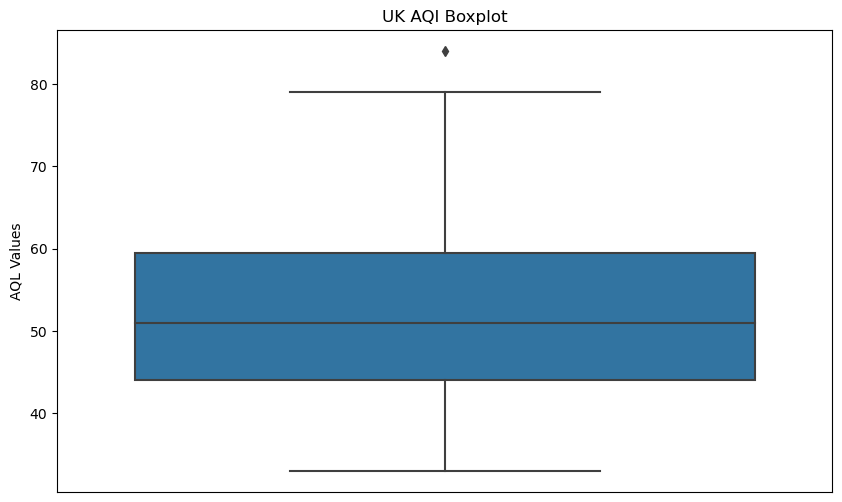

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(uk_outlier,orient="v")
plt.title('UK AQI Boxplot')
plt.xticks([])
plt.ylabel('AQL Values')
plt.show()

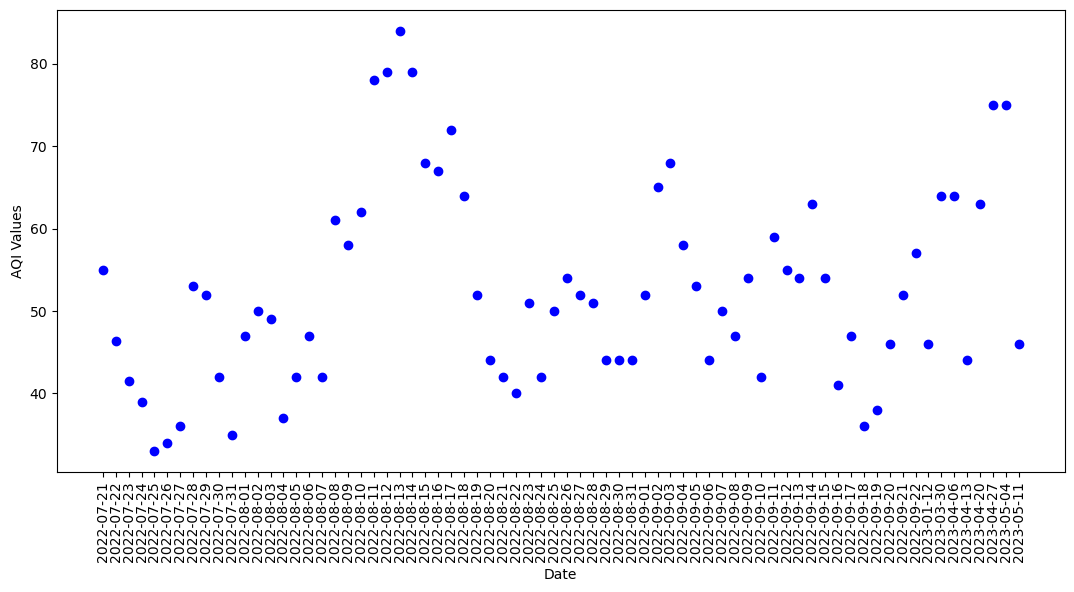

In [115]:
plt.figure(figsize=(13,6))
plt.scatter(uk_outlier.index,uk_outlier.values,marker='o',color='blue')

plt.xlabel('Date')
plt.ylabel('AQI Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 4.Show relation between AQI of India and Nepal

In [126]:
x=df[df.Country=='India'].groupby('Date')['AQI Value'].mean()
y=df[df.Country=='Nepal'].groupby('Date')['AQI Value'].mean()

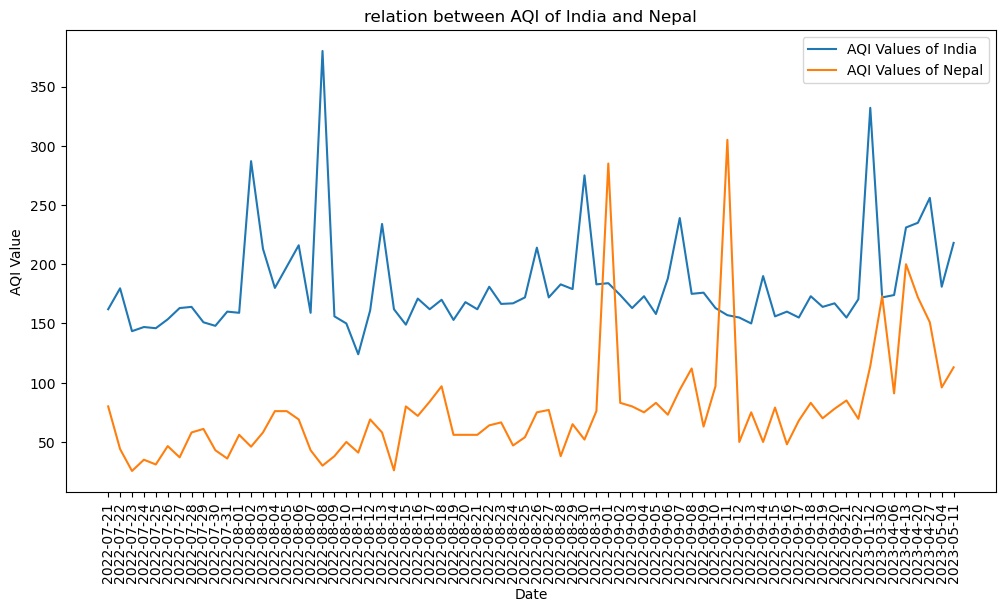

In [127]:
plt.figure(figsize=(12,6))
sns.lineplot(x,label="AQI Values of India")
sns.lineplot(y,label='AQI Values of Nepal')
plt.xticks(rotation=90)
plt.legend()
plt.title('relation between AQI of India and Nepal')
plt.show()

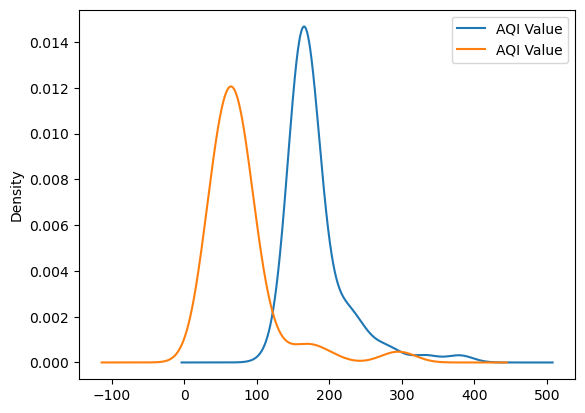

In [134]:
x.plot.density()
y.plot.density()
plt.legend()

In [ ]:
# 5.Show relation between AQI of US and Canada

In [124]:
x=df[df.Country=='United States of America'].groupby('Date')['AQI Value'].mean()
y=df[df.Country=='Canada'].groupby('Date')['AQI Value'].mean()

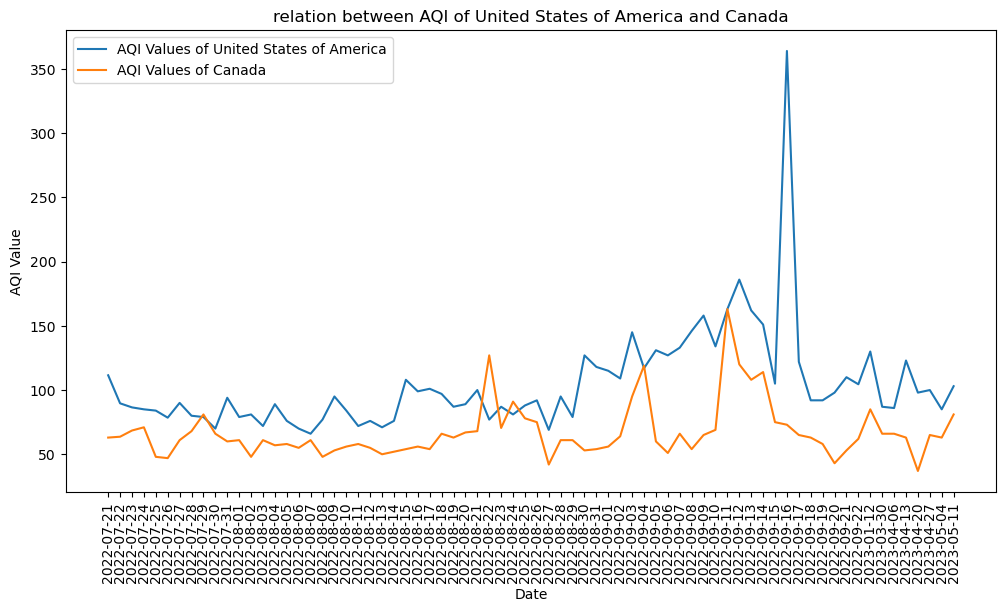

In [125]:
plt.figure(figsize=(12,6))
sns.lineplot(x,label="AQI Values of United States of America")
sns.lineplot(y,label='AQI Values of Canada')
plt.xticks(rotation=90)
plt.legend()
plt.title('relation between AQI of United States of America and Canada')
plt.show()

In [135]:
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57
11096,2023-05-11,Vatican,Good,50
11097,2023-05-11,Venezuela,Good,17
11098,2023-05-11,Vietnam,Moderate,94
